In [2]:
from RobustGibbs.Quantile import Gibbs_Quantile
import numpy as np
import seaborn as sns
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

In [4]:
loc,scale,shape=10,2,3
N=1000
T=1000
Out_list=[]
K_list=[2,3,4,5,9]
for K in K_list:
    
    P=np.linspace(0,1,K+2)[1:-1]
    Q=weibull_min(c=shape,loc=loc,scale=scale).ppf(P)
    Out_list.append(Gibbs_Quantile(T,N,Q,P,"translated_weibull",std_prop_quantile=.02,List_X=True,epsilon=.001,std_prop_loc=5e-2,std_prop_scale=5e-2,std_prop_shape=2e-1,prior_loc="normal",prior_scale="gamma",prior_shape="gamma",par_prior_loc=[0,10],par_prior_scale=[2,2],par_prior_shape=[2,2]))

100%|██████████| 1000/1000 [00:08<00:00, 123.70it/s]


I= [334. 667.] Q.shape= (0, 1001)
Acceptation rates MH : loc = 18.60% scale = 46.40% shape = 21.90% 


100%|██████████| 1000/1000 [00:23<00:00, 41.68it/s]


I= [250. 500. 750.] Q.shape= (3, 1001)
Acceptance rate of Q 0 = 43.86%
Acceptance rate of Q 1 = 48.55%
Acceptance rate of Q 2 = 44.26%
Acceptation rates MH : loc = 27.20% scale = 47.80% shape = 27.60% 


100%|██████████| 1000/1000 [00:27<00:00, 36.12it/s]


I= [200. 400. 600. 800.] Q.shape= (4, 1001)
Acceptance rate of Q 0 = 37.26%
Acceptance rate of Q 1 = 46.05%
Acceptance rate of Q 2 = 44.16%
Acceptance rate of Q 3 = 37.26%
Acceptation rates MH : loc = 27.00% scale = 42.90% shape = 29.50% 


100%|██████████| 1000/1000 [00:24<00:00, 41.40it/s]


I= [167. 334. 500. 667. 833.] Q.shape= (3, 1001)
Acceptance rate of Q 0 = 54.25%
Acceptance rate of Q 1 = 46.75%
Acceptance rate of Q 2 = 53.15%
Acceptation rates MH : loc = 35.00% scale = 46.60% shape = 30.20% 


100%|██████████| 1000/1000 [00:47<00:00, 21.22it/s]

I= [100. 200. 300. 400. 500. 600. 700. 800. 900.] Q.shape= (9, 1001)
Acceptance rate of Q 0 = 28.17%
Acceptance rate of Q 1 = 40.56%
Acceptance rate of Q 2 = 45.05%
Acceptance rate of Q 3 = 41.66%
Acceptance rate of Q 4 = 43.56%
Acceptance rate of Q 5 = 48.45%
Acceptance rate of Q 6 = 43.16%
Acceptance rate of Q 7 = 39.06%
Acceptance rate of Q 8 = 30.17%
Acceptation rates MH : loc = 40.60% scale = 44.90% shape = 35.70% 


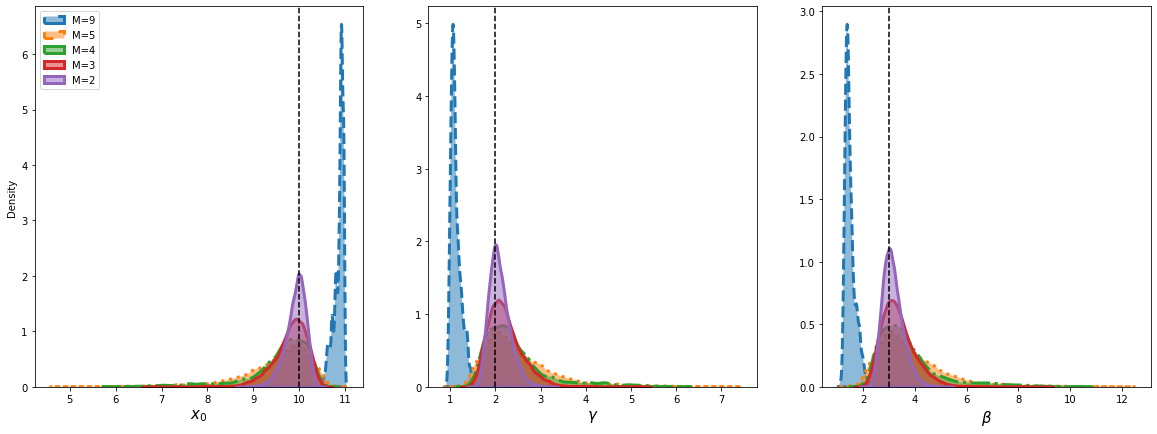

In [50]:
f,ax=plt.subplots(1,3,figsize=(20,7))
LS=["--","dotted","-.","-","-",'-']
burnin=1000
lw=3
Gibbs=test
i=0
for i,k in enumerate(K_list[::-1]):
    Gibbs=out_list[i]
    sns.kdeplot(Gibbs["chains"]["loc"][burnin:],ax=ax[0],label="M={}".format(k),alpha=.5,fill=True,linewidth=lw,linestyle=LS[i])
    
    sns.kdeplot(Gibbs["chains"]["scale"][burnin:],ax=ax[1],alpha=.5,fill=True,linewidth=lw,linestyle=LS[i])

    sns.kdeplot(Gibbs["chains"]["shape"][burnin:],ax=ax[2],alpha=.5,fill=True,linewidth=lw,linestyle=LS[i])

fontsize=15
ax[0].axvline(loc,color="black",linestyle="--")
ax[0].set_xlabel("$x_0$",fontsize=fontsize)
ax[1].axvline(scale,color="black",linestyle="--")
ax[1].set_xlabel("$\gamma$",fontsize=fontsize)
ax[1].set_ylabel("",fontsize=fontsize)
ax[2].axvline(shape,color="black",linestyle="--")
ax[2].set_xlabel("$\\beta$",fontsize=fontsize)
ax[2].set_ylabel("",fontsize=fontsize)

ax[0].legend()

plt.savefig("figure_6.png")


4


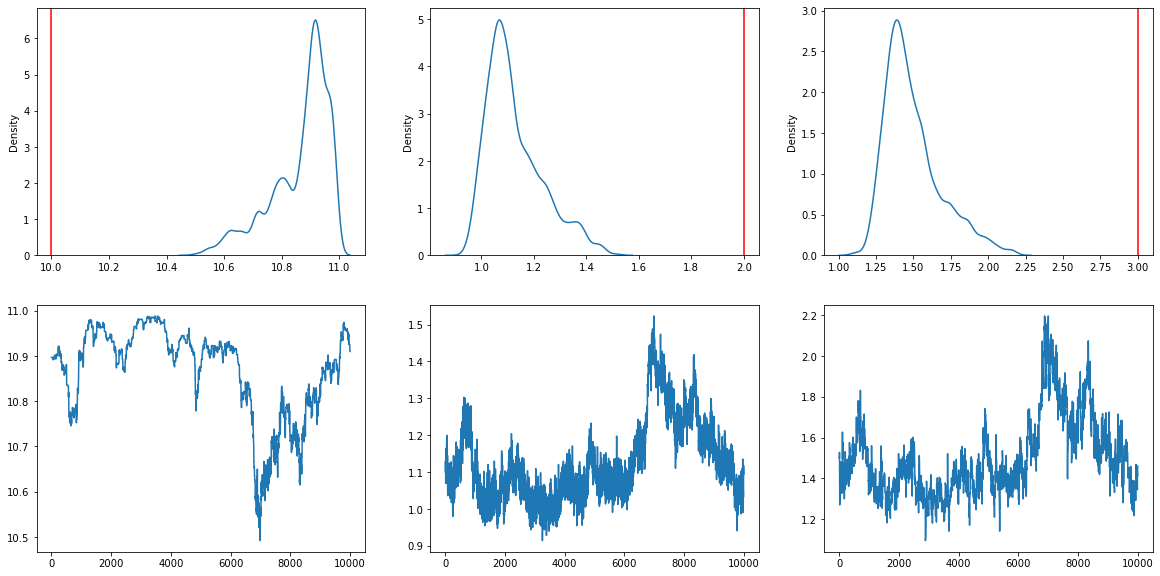

In [ ]:
f,ax=plt.subplots(2,3,figsize=(20,10))
i=1
K_list=[3,4,5,9]
print(K_list[i])
Gibbs=test2
i=0
burnin=0
sns.kdeplot(Gibbs["chains"]["loc"][burnin:],ax=ax[0,0])
ax[1,0].plot(Gibbs["chains"]["loc"][burnin:])
ax[0,0].axvline(loc,color="red")
ax

sns.kdeplot(Gibbs["chains"]["scale"][burnin:],ax=ax[0,1])
ax[1,1].plot(Gibbs["chains"]["scale"][burnin:])
ax[0,1].axvline(scale,color="red")

sns.kdeplot(Gibbs["chains"]["shape"][burnin:],ax=ax[0,2])
ax[1,2].plot(Gibbs["chains"]["shape"][burnin:])
ax[0,2].axvline(shape,color="red")